## Problem Statement
 Stroke is a leading cause of death and long-term disability worldwide. Early identification of individuals at high risk for stroke can lead to timely interventions and improved outcomes. However, current methods for assessing stroke risk often rely on clinical assessments that may not be comprehensive or timely.
This project aims to develop and evaluate supervised machine learning models to predict stroke risk using patient demographic, medical, and lifestyle data.

## Importing Libraries
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset

In [2]:
stroke_data = pd.read_csv('dataset/dataset.csv')

In [3]:
stroke_data.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


Data consists of both categorical and numerical features, including:
- `id`: Unique identifier for each patient
- `gender` : Male or Female
- `age`: Age of the patient
- `hypertension`: Whether the patient has hypertension (1) or not (0)
- `heart_disease`: Whether the patient has heart disease (1) or not (0)
- `ever_married`: Whether the patient has ever been married (Yes or No)
- `work_type`: Type of work the patient does (e.g., Private, Self-employed, Government, Children, Never_worked)
- `Residence_type`: Type of residence (Urban or Rural)
- `avg_glucose_level`: Average glucose level in the blood
- `bmi`: Body Mass Index
- `smoking_status`: Smoking status of the patient (e.g., formerly smoked, never smoked, smokes, unknown)
- `stroke`: Whether the patient has had a stroke (1) or not (0) 


In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
stroke_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

## Analyzing the Features

## Age

In [7]:
stroke_data.age.isnull().sum()

np.int64(0)

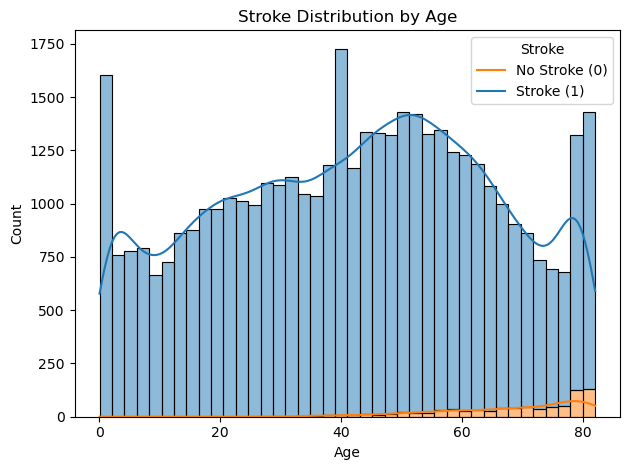

In [8]:
sns.histplot(data=stroke_data, x='age', hue='stroke' , multiple='stack', kde=True)  

# Labeling
plt.title('Stroke Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Gender

In [9]:
stroke_data['gender'].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [10]:
stroke_data[stroke_data['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
10768,26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0
15620,52984,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smokes,0
15838,24893,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,NaN,0
19748,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0
21041,31015,Other,19.0,0,0,No,Private,Rural,75.76,32.2,formerly smoked,0
21192,27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never smoked,0
24252,51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,formerly smoked,0
26199,42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0
26831,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0


In [11]:
# since there is only one record that consists Gender as 'Other', we can replace it with the most common or most occuered gender 
print(stroke_data['gender'].mode()[0])  # This will give us the most common gender
# replacing 'Other' with the most common
stroke_data = stroke_data.replace({'Other': 'Female'})

Female


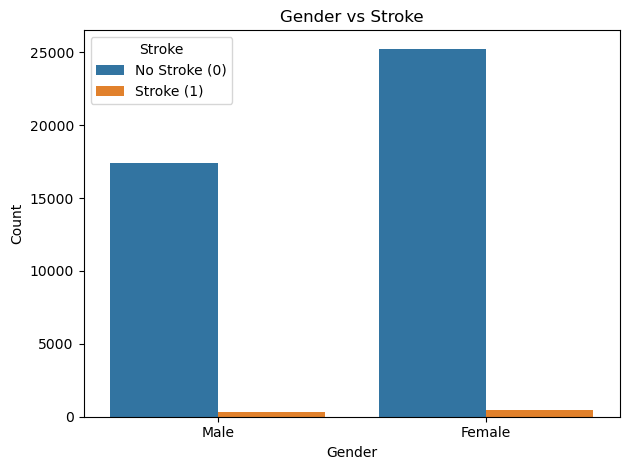

In [12]:
sns.countplot(data=stroke_data, x='gender', hue='stroke')
plt.title('Gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Ever Married (Marital Status)


In [13]:
stroke_data.ever_married.value_counts()

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

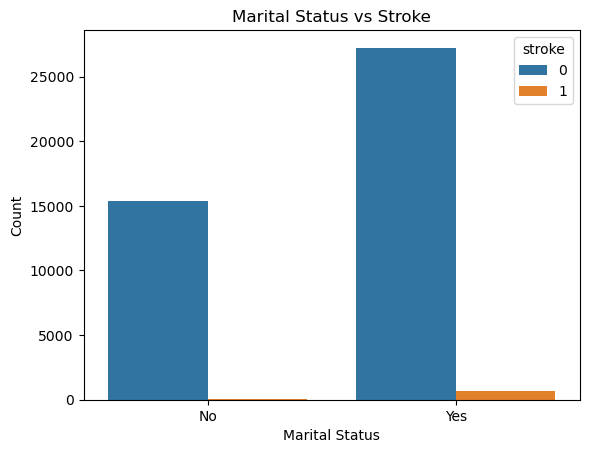

In [14]:
sns.countplot(data=stroke_data, x='ever_married', hue='stroke')
plt.title('Marital Status vs Stroke')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Work Type

In [15]:
stroke_data.work_type.value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [16]:
stroke_data.replace({'children': 'Children', 'Self-employed': 'Self Employed', 'Govt_job': 'Government Job', 'Never_worked': 'Never Worked'}, inplace=True)

In [17]:
stroke_data.work_type.value_counts()

work_type
Private           24834
Self Employed      6793
Children           6156
Government Job     5440
Never Worked        177
Name: count, dtype: int64

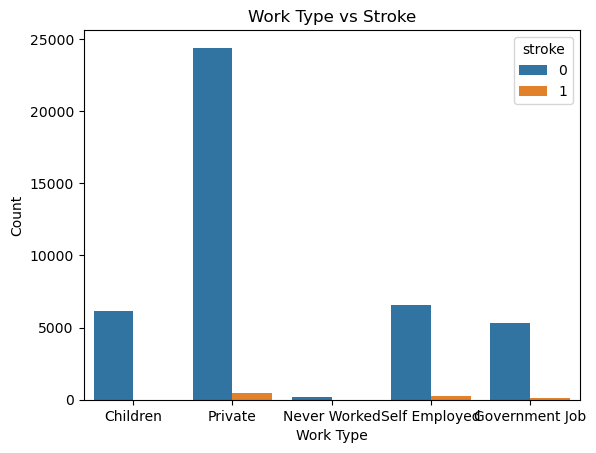

In [18]:
sns.countplot(data=stroke_data, x='work_type', hue='stroke')
plt.title('Work Type vs Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()


## Residence Type

In [19]:
stroke_data.Residence_type.value_counts()

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

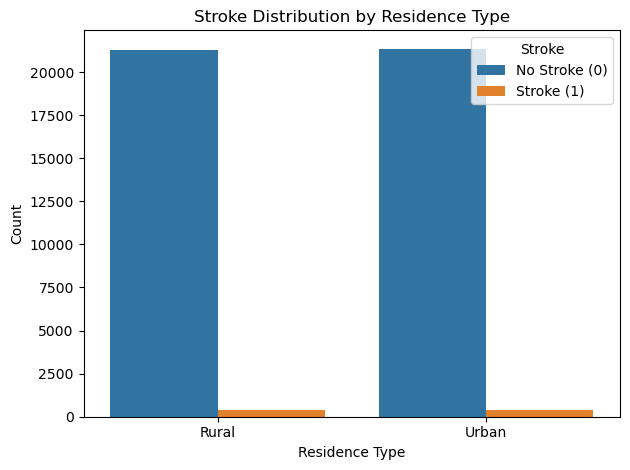

In [20]:
sns.countplot(data=stroke_data, x='Residence_type', hue='stroke')
plt.title('Stroke Distribution by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Smoking Status

In [21]:
stroke_data.smoking_status.value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

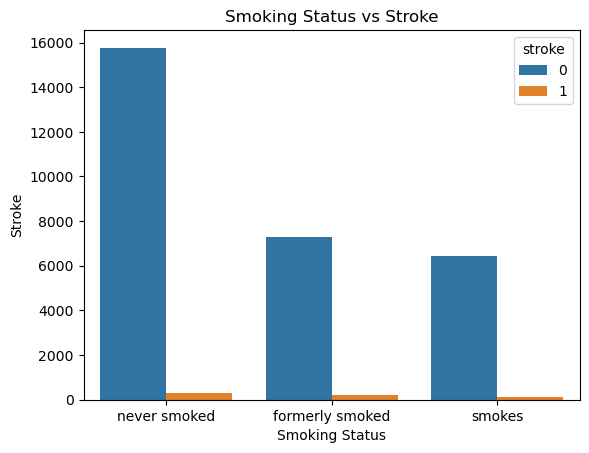

In [22]:
sns.countplot(data=stroke_data, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.show()

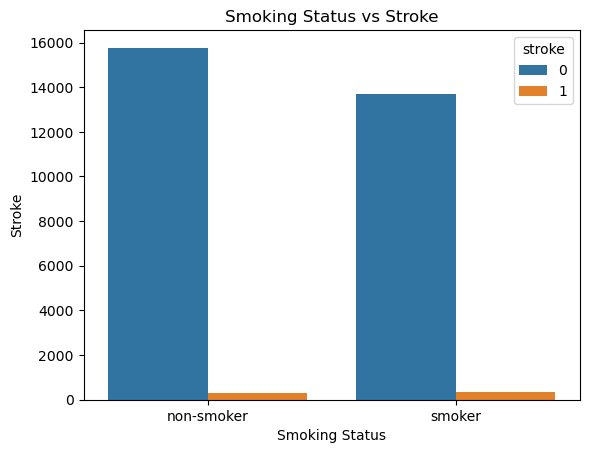

In [23]:
# we can combine the 'formerly smoked' and 'smokes' categories into a single 'smoker' category
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace({'formerly smoked': 'smoker', 'smokes': 'smoker' , 'never smoked': 'non-smoker'})    
sns.countplot(data=stroke_data, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke')
plt.show()


## Hypertension

In [24]:
stroke_data.hypertension.value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

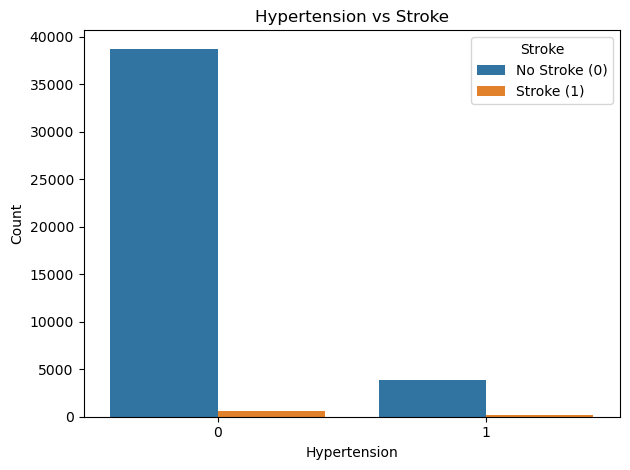

In [25]:
sns.countplot(x='hypertension', data=stroke_data, hue='stroke')
plt.title('Hypertension vs Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Heart Disease

In [26]:
stroke_data.heart_disease.value_counts()

heart_disease
0    41338
1     2062
Name: count, dtype: int64

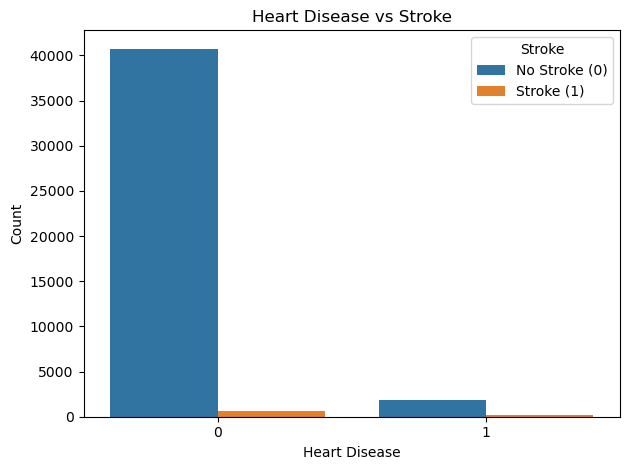

In [27]:
sns.countplot(x='heart_disease', data=stroke_data, hue='stroke')
plt.title('Heart Disease vs Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## Avg Glucose Level

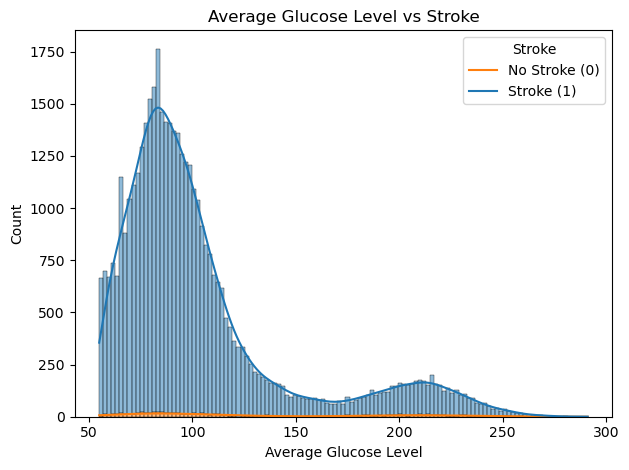

In [28]:
# distribution of average glucose level with respect to stroke
sns.histplot(data=stroke_data, x='avg_glucose_level', hue='stroke', multiple='stack', kde=True)
plt.title('Average Glucose Level vs Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()

## BMI

In [29]:
# BMI
stroke_data['bmi'].isnull().sum()

np.int64(1462)

In [30]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(round (stroke_data['bmi'].median(), 2))
stroke_data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

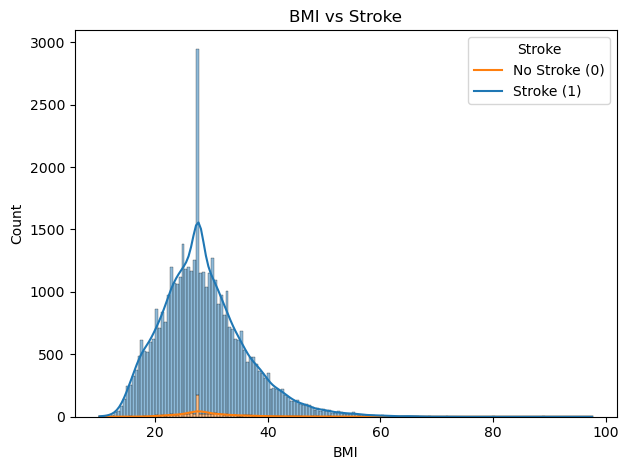

In [31]:
# distribution of BMI with respect to stroke
sns.histplot(data=stroke_data, x='bmi', hue='stroke', multiple='stack', kde=True)
plt.title('BMI vs Stroke')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()  

## Data Visualization

In [32]:
stroke_data.drop('id', inplace=True , axis=1)


In [33]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,Children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,non-smoker,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,smoker,0
4,Male,14.0,0,0,No,Never Worked,Rural,161.28,19.1,NaN,0


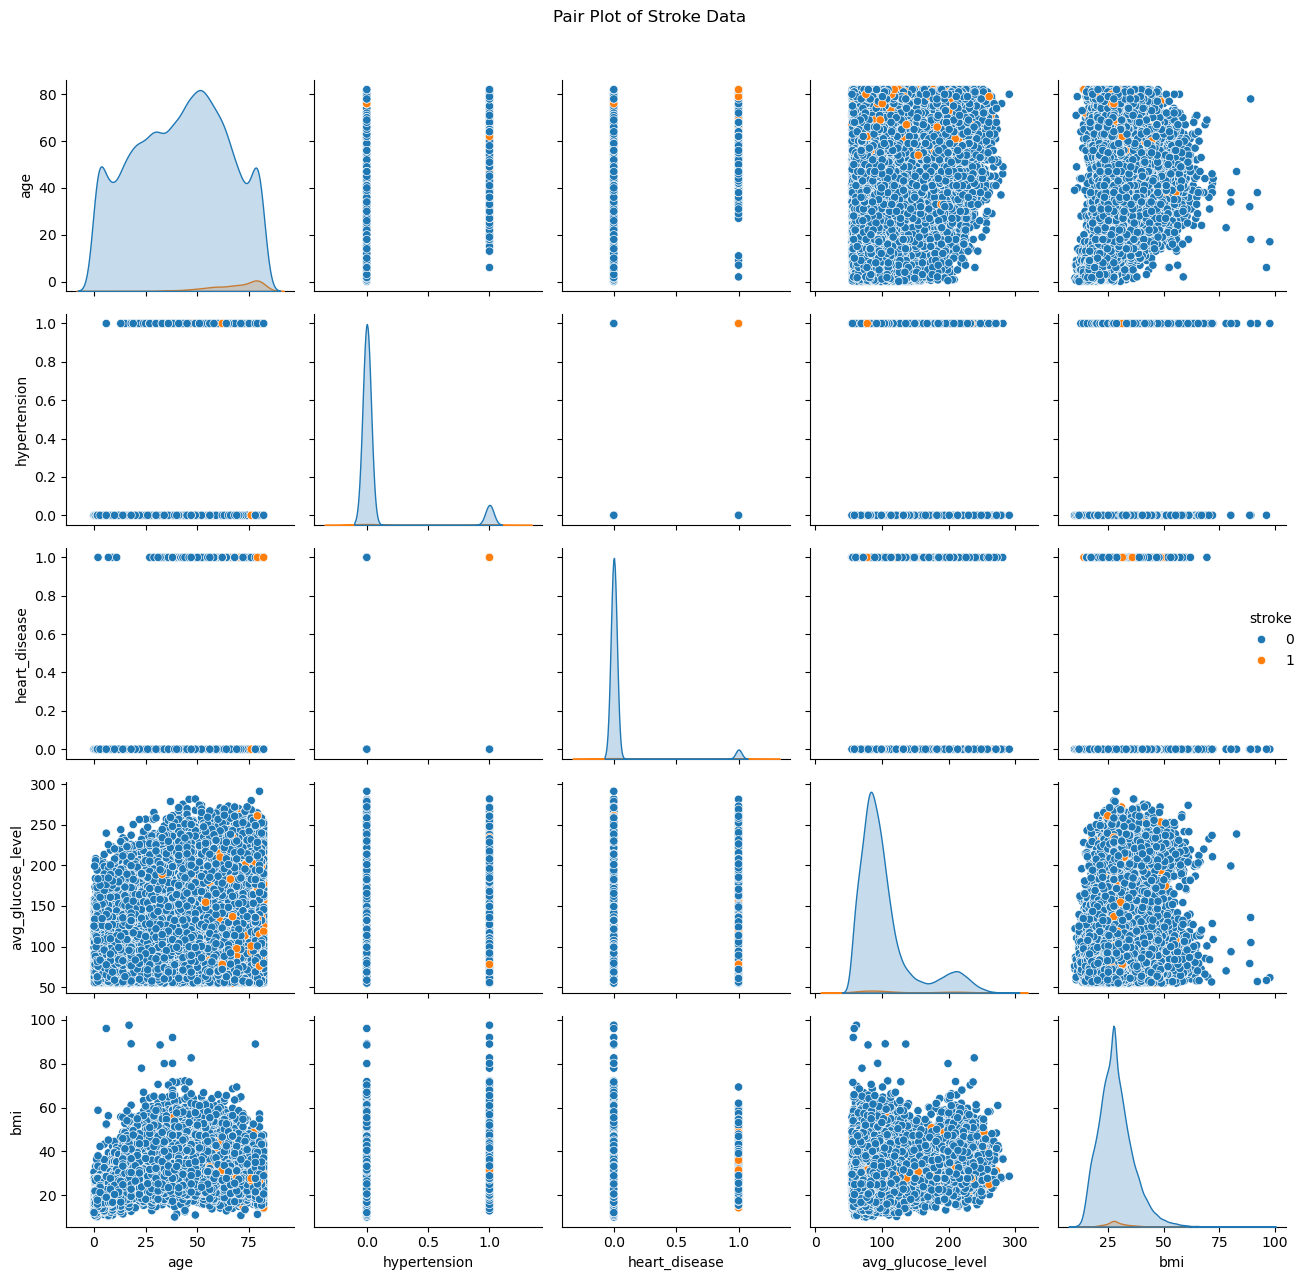

In [34]:
sns.pairplot(stroke_data, hue='stroke' , diag_kind='kde')
plt.suptitle('Pair Plot of Stroke Data', y=1.02)
plt.tight_layout()
plt.show()

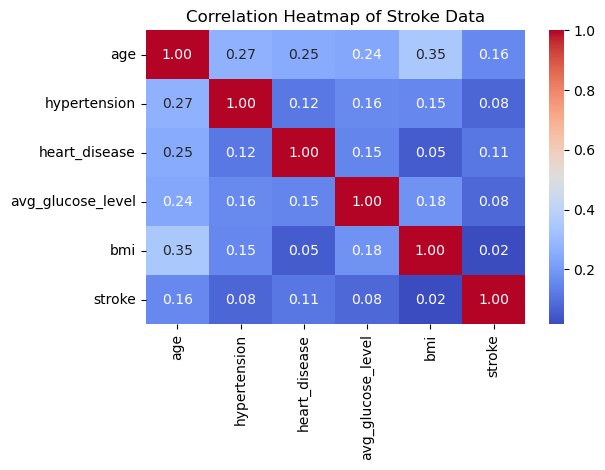

In [35]:
numeric_cols = stroke_data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Stroke Data')
plt.tight_layout()
plt.show()


## Verdict of the Analysis
- Hypertension and heart disease are significant risk factors for stroke.
- Average glucose level and BMI are also important indicators of stroke risk.
- Age is a critical factor, with older individuals at higher
- In Work Type 
    - Private, Self-employed and Government Job individuals have a risk of stroke.
    - Whereas Children and Never_worked individuals have a negligible risk of stroke.
- Smoking status also plays a role, with those who smoke or have smoked previously being at higher risk.
- Gender do appear to have an impact on stroke risk but not as significant as other factors.
- Marital do show some correlation with stroke risk but is not as pronounced as other factors.
- Residence type does not show a significant difference in stroke risk. Hence it can be considered as a less significant factor.
- The distribution of age shows that stroke cases are more prevalent in older age groups.
- The distribution of average glucose levels indicates that higher glucose levels are associated with stroke risk.
- The distribution of BMI shows that higher BMI values are associated with stroke risk.
- The distribution of work types indicates that Private and Self-employed individuals have a higher risk of stroke
- The distribution of smoking status shows that those who smoke or have smoked previously are at higher risk of stroke.
- The distribution of stroke cases is skewed, with a higher number of non-stroke cases compared to stroke cases.


In [36]:
# removing residence type 
stroke_data.drop('Residence_type', inplace=True, axis=1)

In [37]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,Children,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,87.96,39.2,non-smoker,0
2,Female,8.0,0,0,No,Private,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,69.04,35.9,smoker,0
4,Male,14.0,0,0,No,Never Worked,161.28,19.1,NaN,0


## Saving the Preprocessed Data
```python
stroke_data.to_csv('preprocessed_stroke_data.csv', index=False)
```

In [38]:
stroke_data.to_csv('preprocessed_stroke_data.csv', index=False)
